In [2]:
import yfinance as yf 
from pandas_datareader import data, wb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
import math as mt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from Data_TP2_V2 import BBANDS, STOK, MACD, RSI, MFI
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd

[*********************100%***********************]  6 of 6 completed


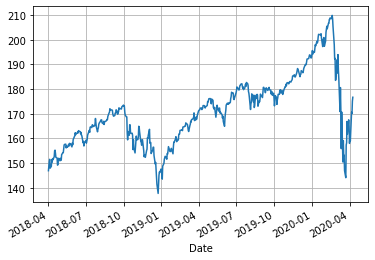

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 18 20:17:53 2020

@author: robert_normand
"""

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Download Data from Yahoo Finance
# Pour lire les données de Yahoo Finance, vous devez installer le toolbox yfinance

start_sp = datetime.datetime(2018,3,31)
end_sp = datetime.datetime(2020, 12,31)

# Use Vanguard ETF
# SP500 Index + 11 Industry

BLack_ETF=['IVV','IWF','IJH','IJR','IWM','IVW']


#BLack_ETF=['IVV','IWF','IJH','IJR','IWM','IWD','ITOT','IVW','IWB','IWR','DVY',
#           'IVE','IWP','IWS','IWV','IUSG','IWO','IWN','IBB','IJK','IUSV',
#           'OEF','IJS','IJJ','IYW','IHI','IJT','ITA','IGV','IYH','SOXX','EWC',
#           'IGM','IYF','JKE','SUSA','IDU','IYY','IYG','JKD','IYC','IYJ','JKG',
#           'IWC','IYK','JKF','JKH','IYT','JKI','IYZ','IGE','IYE','JKL','IYM',
#           'JKJ','JKK','IGN']

Data = yf.download(BLack_ETF, start=start_sp, end=end_sp,group_by="ticker")

# To access data for SP500
SP500_dat=Data['IVW']

# To access the adjusted close price, use
Data['IVW']['Adj Close']

# Graph data
Data['IVW']['Adj Close'].plot(grid=True)

# To get Information about a ticker
SP500_detail = yf.Ticker("IVW")

# Show stock info
#SP500_detail.info


In [4]:
#SP500_dat

In [5]:
#les rendements quotidiens
df = pd.DataFrame([data.DataReader(etf, 'yahoo', start_sp, end_sp)['Adj Close'] for etf in BLack_ETF]).T
df.columns = BLack_ETF
rendement = df.pct_change()
#rendement
df

,IVV,IWF,IJH,IJR,IWM,IVW
Date,,,,,,
2018-04-02,248.172958,129.831482,176.987183,72.981987,144.210403,146.936676
2018-04-03,251.399490,131.337021,179.431747,74.077927,146.274307,148.733047
2018-04-04,254.319641,133.087051,181.016418,75.008995,148.133759,150.616867
2018-04-05,256.090820,134.015823,182.388504,75.813980,149.360413,151.558777
2018-04-06,250.432495,130.945984,178.765060,74.446472,146.381378,147.965958
2018-04-09,251.514389,131.337021,178.871353,74.252518,146.556610,148.694229
2018-04-10,255.602570,133.673615,181.731445,75.658806,149.321472,151.354828
2018-04-11,254.214249,133.018600,181.509201,75.784882,149.642731,150.442108
2018-04-12,256.387665,134.103775,182.291840,76.163132,150.664932,151.859787


In [6]:
# Mettre le rendement en 0 = descente 1= montée
j=1
for ticker in BLack_ETF:
    for j in range(len(rendement)):
        if rendement[ticker][j]<0:
            rendement[ticker][j]=0
        else:
            rendement[ticker][j]=1
rendement_bin=rendement
rendement_bin

,IVV,IWF,IJH,IJR,IWM,IVW
Date,,,,,,
2018-04-02,1.0,1.0,1.0,1.0,1.0,1.0
2018-04-03,1.0,1.0,1.0,1.0,1.0,1.0
2018-04-04,1.0,1.0,1.0,1.0,1.0,1.0
2018-04-05,1.0,1.0,1.0,1.0,1.0,1.0
2018-04-06,0.0,0.0,0.0,0.0,0.0,0.0
2018-04-09,1.0,1.0,1.0,0.0,1.0,1.0
2018-04-10,1.0,1.0,1.0,1.0,1.0,1.0
2018-04-11,0.0,0.0,0.0,1.0,1.0,0.0
2018-04-12,1.0,1.0,1.0,1.0,1.0,1.0


# Pour chacun des ETF, vous fournissez les statistiques de base

a.	Rendement moyen, volatilité, quantile, etc.

In [6]:
list_etf = []
for etf in BLack_ETF:
    list_etf.append(df[etf].describe())

b.	L’analyse peut être présentée sous forme de tableaux et graphiques 

In [7]:
#list_etf

In [8]:
df_describe = pd.DataFrame(list_etf)

In [9]:
#df_describe

2.	Par la suite, vous validez la performance des 5 indicateurs techniques appliqués sur chaque ETF

a.	Vous calculez la performance du signal

###### BollingerBands, Oscilateur stochastique, MACD, RSI, Money Flow

#### 1- Indicateurs

In [10]:
result_BB = pd.DataFrame()
result_STOK = pd.DataFrame()
result_MACD = pd.DataFrame()
result_RSI = pd.DataFrame()
result_MFI = pd.DataFrame()

for ticker in BLack_ETF:
    daf = BBANDS(Data[ticker],"Close",21,2)
    result_BB[ticker+'_HIGH'] = daf.iloc[:,-1]
    result_BB[ticker+'_LOW'] = daf.iloc[:,-2]
    
    daf = STOK(Data[ticker])
    result_STOK[ticker] = daf.iloc[:,-1]
    
    daf = MACD(Data[ticker],"Adj Close",5,25,9)
    result_MACD[ticker] = df.iloc[:,-1]
    result_MACD[ticker+'_SIGN'] = daf.iloc[:,-2]
    result_MACD[ticker+'_DIFF'] = daf.iloc[:,-3]
    
    daf = RSI(Data[ticker],14)
    result_RSI[ticker] = daf.iloc[:,-1]
    
    daf = MFI(Data[ticker],14)
    result_MFI[ticker] = daf.iloc[:,-1]
    

In [11]:
#result_MACD

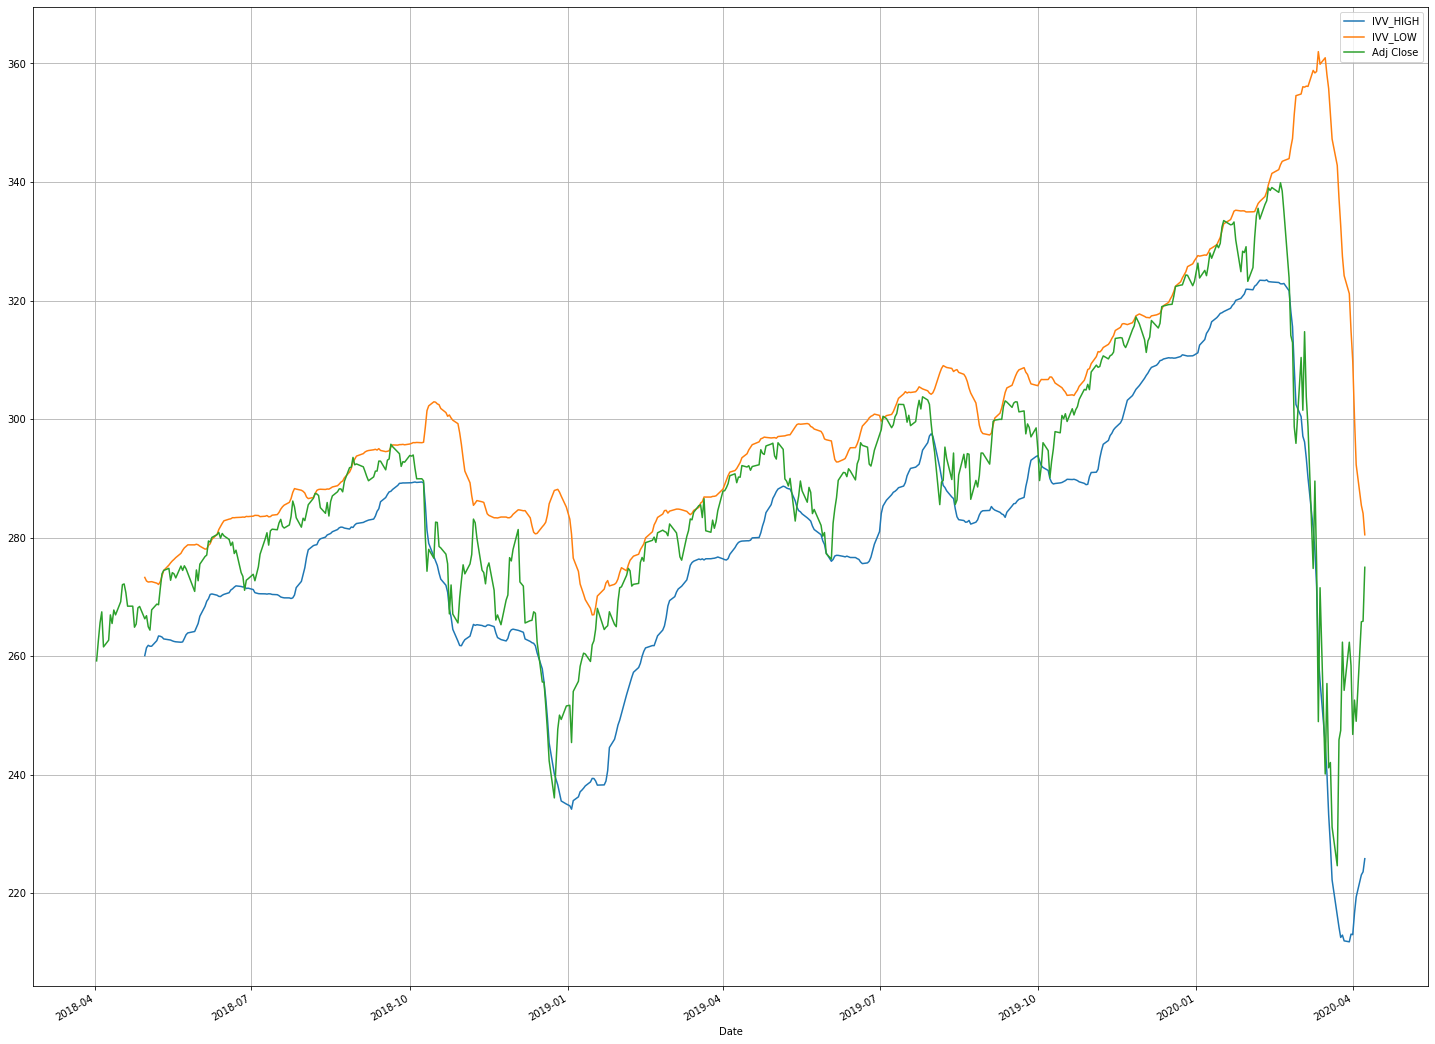

In [12]:
#Exemple de graphique
df = pd.DataFrame()
mycolumn=['IVV_HIGH','IVV_LOW']
df[mycolumn]= result_BB[mycolumn]
df['Adj Close'] = Data['IVV']['Close']
df.plot(grid=True, figsize = (25,20))

### 2 - Signal

#### Bollinger Bands

Pour Bollinger Bands si close price est supérieure à +2SD -> Long
                     ; si close price est inférieure à -2SD -> Short
                     ; sinon Neutral

In [13]:
Signal_BBAND = Data
for ticker in BLack_ETF:
    i = 0
    signal = []
    while i <= len(df.index)-1: 
        haut_BB = result_BB[ticker+'_HIGH'][i]
        bas_BB = result_BB[ticker+'_LOW'][i]
        haut_stock = Data[ticker]['High'][i]
        bas_stock = Data[ticker]['Low'][i]
        if haut_stock > haut_BB:
            Sig = 1
        elif bas_stock < bas_BB:
            Sig = -1
        else:
            Sig = 0
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_BBAND', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_BBAND')]))
    S2D[ticker] = S
    Signal_BBAND = Signal_BBAND.join(S2D)

#### Oscillateur stochastique

Pour Oscillateur stochastique si Stok =< 20 -> Long
                              ;si Stok >= 80 -> Short
                              ;sinon Neutral

In [14]:
Signal_STOK = Data
for ticker in BLack_ETF:
    i = 0
    signal = []
    while i <= len(df.index)-1: 
        stok = result_STOK[ticker][i]
        if stok <= 0.20:
            Sig = 1
        elif stok >= 0.80:
            Sig = -1
        else:
            Sig = 0
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_STOK', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_STOK')]))
    S2D[ticker] = S
    Signal_STOK = Signal_STOK.join(S2D)

#### MACD

Pour MACD si MACDdiff > 0 -> Long
          ;si MACDdiff < 0 -> Short
          ;si MACDdiff = 0 -> Neutral

In [15]:
Signal_MACD = Data
for ticker in BLack_ETF:
    i = 0
    signal = []
    while i <= len(df.index)-1:
        MACD = result_MACD[ticker+'_DIFF'][i] 
        if MACD > 0:
            Sig = 1
        elif MACD == 0:
            Sig = 0
        else:
            Sig = -1
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_MACD', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_MACD')]))
    S2D[ticker] = S
    Signal_MACD = Signal_MACD.join(S2D)

#### RSI

Pour RSI si RSI =< 30 -> Long 
         ;si RSI >= 70 -> Short
         ;sinon neutral

In [16]:
Signal_RSI = Data
for ticker in BLack_ETF:   
    df = RSI(Data[ticker],14)
    i = 0
    signal = []
    while i <= len(df.index)-1: 
        if df.iloc[i,-1] >= 70:
            Sig = -1
        elif df.iloc[i,-1] <= 30:
            Sig = 1
        else:
            Sig = 0
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_RSI', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_RSI')]))
    S2D[ticker] = S
    Signal_RSI = Signal_RSI.join(S2D)

#### Money Flow Index

Pour Money Flow ;si MFI < 30 -> Long
                :si MFI > 70 -> Short
                :sinon neutral

In [17]:
Signal_MFI = Data
for ticker in BLack_ETF:   
    df = MFI(Data[ticker],14)
    i = 0
    signal = []
    while i <= len(df.index)-1: 
        if df.iloc[i,-1] >= 70:
            Sig = -1
        elif df.iloc[i,-1] <= 30:
            Sig = 1
        else:
            Sig = 0
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_MFI', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_MFI')]))
    S2D[ticker] = S
    Signal_MFI = Signal_MFI.join(S2D)

In [18]:
# Mettre ensemble tous les tableaux
sig = ['Signal_MFI','Signal_RSI','Signal_BBAND','Signal_STOK','Signal_MACD']
indicateur =['MFI','RSI','BBAND','STOK','MACD']
debut = len(BLack_ETF)*6
fin = debut + len(BLack_ETF)
Signal_5indicateurs = Signal_BBAND.iloc[:,debut:fin]
Signal_5indicateurs = Signal_5indicateurs.join(Signal_MACD.iloc[:,debut:fin])
Signal_5indicateurs = Signal_5indicateurs.join(Signal_RSI.iloc[:, debut:fin])
Signal_5indicateurs = Signal_5indicateurs.join(Signal_MFI.iloc[:, debut:fin])
Signal_5indicateurs = Signal_5indicateurs.join(Signal_STOK.iloc[:, debut:fin])

Signal_tot = pd.DataFrame(columns=sig)
rend_tot = pd.DataFrame()
for etf in BLack_ETF:
    mat1 = Signal_5indicateurs[etf][sig]
    mat2 = rendement_bin[etf]
    frames1 = [Signal_tot, mat1]
    frames2 = [rend_tot, mat2]
    Signal_tot = pd.concat(frames1)
    rend_tot = pd.concat(frames2)


In [19]:
Signal_5indicateurs

,IVV,IWF,IJH,IJR,IWM,IVW,IVV,IWF,IJH,IJR,...,IJH,IJR,IWM,IVW,IVV,IWF,IJH,IJR,IWM,IVW
,Signal_BBAND,Signal_BBAND,Signal_BBAND,Signal_BBAND,Signal_BBAND,Signal_BBAND,Signal_MACD,Signal_MACD,Signal_MACD,Signal_MACD,...,Signal_MFI,Signal_MFI,Signal_MFI,Signal_MFI,Signal_STOK,Signal_STOK,Signal_STOK,Signal_STOK,Signal_STOK,Signal_STOK
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-02,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,0,0,0,0,1,0
2018-04-03,0,0,0,0,0,0,1,1,1,1,...,-1,-1,-1,-1,-1,-1,0,-1,-1,-1
2018-04-04,0,0,0,0,0,0,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2018-04-05,0,0,0,0,0,0,1,1,1,1,...,-1,-1,-1,-1,0,0,0,-1,-1,0
2018-04-06,0,0,0,0,0,0,1,1,1,1,...,-1,-1,-1,-1,0,0,0,0,0,0
2018-04-09,0,0,0,0,0,0,1,1,1,1,...,-1,-1,-1,-1,1,1,1,1,1,1
2018-04-10,0,0,0,0,0,0,1,1,1,1,...,-1,-1,-1,-1,0,0,0,0,0,0
2018-04-11,0,0,0,0,0,0,1,1,1,1,...,-1,-1,-1,-1,1,1,0,0,0,1


In [20]:
Signal_BBAND

IWF                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2018-04-02  135.309998  135.899994  131.509995  132.800003  129.831482   
2018-04-03  133.779999  134.699997  132.410004  134.339996  131.337021   
2018-04-04  132.089996  136.419998  131.809998  136.130005  133.087051   
2018-04-05  137.100006  137.690002  136.259995  137.080002  134.015823   
2018-04-06  135.899994  136.789993  133.080002  133.940002  130.945984   
2018-04-09  134.860001  136.449997  134.169998  134.339996  131.337021   
2018-04-10  136.009995  137.190002  135.520004  136.729996  133.673615   
2018-04-11  135.880005  137.110001  135.880005  136.059998  133.018600   
2018-04-12  136.889999  137.729996  136.669998  137.169998  134.103775   
2018-04-13  137.970001  138.020004  136.169998  136.800003  133.742065   
2018-04-16  137.789993  138.380005  137.309998  137.940002  134.856567   
2018-04-17  139.160004  140.490005  138.919998  140.130005  136.997620   
2018-04-18  140.429993  140.720001  139.750000  140.339996  137.202896   
2018-04-19  139.779999  140.210007  138.649994  139.190002  136.078659   
2018-04-20  139.160004  139.240005  137.190002  137.639999  134.563278   
2018-04-23  138.080002  138.509995  136.839996  137.529999  134.455734   
2018-04-24  138.139999  138.179993  133.929993  134.889999  131.874725   
2018-04-25  134.880005  135.429993  133.570007  135.050003  132.031189   
2018-04-26  136.169998  137.710007  135.899994  137.240005  134.172226   
2018-04-27  137.940002  138.220001  136.660004  137.339996  134.269989   
2018-04-30  137.679993  138.289993  136.449997  136.449997  133.399902   
2018-05-01  136.240005  137.330002  135.660004  137.259995  134.191772   
2018-05-02  137.229996  137.910004  136.389999  136.589996  133.536743   
2018-05-03  136.009995  137.039993  134.600006  136.630005  133.575867   
2018-05-04  136.070007  139.009995  136.000000  138.619995  135.521362   
2018-05-07  139.250000  139.869995  138.919998  139.410004  136.293716   
2018-05-08  139.119995  139.649994  138.589996  139.399994  136.283951   
2018-05-09  139.619995  140.839996  139.350006  140.710007  137.564667   
2018-05-10  140.990005  142.199997  140.979996  141.970001  138.796478   
2018-05-11  142.029999  142.500000  141.679993  142.229996  139.050690   
...                ...         ...         ...         ...         ...   
2020-02-27  171.470001  174.660004  167.740005  167.850006  167.353409   
2020-02-28  161.869995  168.050003  161.470001  167.970001  167.473053   
2020-03-02  169.520004  175.679993  167.250000  175.660004  175.140289   
2020-03-03  176.399994  178.300003  168.839996  170.350006  169.846008   
2020-03-04  174.210007  177.800003  172.330002  177.729996  177.204163   
2020-03-05  173.399994  175.660004  170.639999  171.850006  171.341568   
2020-03-06  166.869995  170.050003  164.929993  169.210007  168.709381   
2020-03-09  156.190002  163.039993  155.500000  157.210007  156.744888   
2020-03-10  163.050003  165.880005  157.350006  165.839996  165.349350   
2020-03-11  161.410004  162.479996  156.059998  158.089996  157.622269   
2020-03-12  146.600006  153.779999  140.229996  143.660004  143.234970   
2020-03-13  151.550003  156.509995  144.000000  156.509995  156.046951   
2020-03-16  137.419998  147.649994  130.809998  138.059998  137.651535   
2020-03-17  140.380005  146.779999  135.250000  146.089996  145.657776   
2020-03-18  136.220001  140.990005  131.320007  139.279999  138.867920   
2020-03-19  137.509995  144.000000  134.389999  139.919998  139.506027   
2020-03-20  141.740005  143.660004  133.690002  133.979996  133.583603   
2020-03-23  133.169998  135.000000  128.229996  131.630005  131.240570   
2020-03-24  138.169998  143.820007  137.750000  143.649994  143.224991   
2020-03-25  144.529999  150.029999  141.139999  144.320007  144.320007   
2020-03-26  146.059998 

Performance

In [21]:
NbrJour = 1
rendement=0
rendement_ETF=0
rendement_tot = []
rendement_signal = pd.DataFrame()
for signal in sig:  
    for ticker in BLack_ETF:
        for i in range(len(Data)):
            Signal = Signal_5indicateurs[ticker][signal][i]
            ouverture = Data[ticker]['Open'][i]
            fermeture = Data[ticker]['Close'][i]
            if Signal==1:
                rendement = (-ouverture + fermeture)/ouverture*100
            elif Signal==-1:
                rendement = (ouverture - fermeture)/fermeture*100
            rendement_ETF += rendement
            rendement=0
        rendement_tot.append(rendement_ETF)
        rendement_ETF=0
    rendement_signal[signal+'_%'] = np.transpose(rendement_tot)
    rendement_tot=[]

In [22]:
rendement_signal.index=BLack_ETF
rendement_signal
rendement_signal_moy = rendement_signal.mean()
rendement_signal_moy

Signal_MFI_%      -20.179501
Signal_RSI_%      -42.239555
Signal_BBAND_%      2.857491
Signal_STOK_%    -225.920799
Signal_MACD_%      35.505490
dtype: float64

b.	Vous fournissez les statistiques sur la performance de la classification

1) Generic Accuracy

In [23]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
accuracy = []
confusion =[]
precision = pd.DataFrame()
for signal in sig:  
    for ticker in BLack_ETF:
        y_true = rendement_bin[ticker]
        y_pred = Signal_5indicateurs[ticker][signal]
        precision = pd.DataFrame(y_true,y_pred)
        precision[(precision!=0).all(1)]
        accuracy.append(accuracy_score(y_true, y_pred))
        confusion.append(confusion_matrix(y_true, y_pred))

2) Matrice de confusion

In [24]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
confusion =[]
for signal in sig:  
    for ticker in BLack_ETF:
        y_true = rendement_bin[ticker]
        y_pred = Signal_5indicateurs[ticker][signal]
        confusion.append(confusion_matrix(y_true, y_pred))

3) ROC Curve

In [25]:
#Signal_5indicateurs

In [26]:
#df_describe

Separation de l'echntillon - 70% echantillon d'entrainement et 30%  echantillon de test

# Model Logit

In [27]:
X = np.array(Signal_tot)
Y = np.array(rend_tot)

In [28]:
def calculate_aic(n, mse, num_params):
    aic = n * mt.log(mse) + 2 * num_params
    return aic

In [29]:
def calculModelLogit(X,Y):
    trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.30, random_state = 0)
    ModeleLogit = LogisticRegression()
    TrainFit = ModeleLogit.fit(trainX, trainY)
    TrainScores = ModeleLogit.score(trainX, trainY)
    print('Train score=',TrainScores)
    
    TestsScore = ModeleLogit.score(testX, testY)
    print('Test score=',TestsScore)
    
    predictions = ModeleLogit.predict(testX)
    proba = ModeleLogit.predict_proba(testX)[:,1]
    
    mse = mean_squared_error(testY, predictions)
    aic = calculate_aic(len(testY),mse,len(X.T))
    print('AIC score :',aic)
    return predictions, TrainScores, TestsScore, aic, ModeleLogit.coef_, testY, ModeleLogit, proba

In [30]:
def getROC(yTest, prediction, proba):
    fpr, tpr, thres = roc_curve(yTest, proba)
    ac = roc_auc_score(yTest, prediction)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % ac)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [31]:
def getMC(yTest, prediction):
    matrice = confusion_matrix(yTest, prediction)
    print(matrice) 

In [32]:
def verificationCoef(coef, data):
    dataAmeliorer = data
    for i in range(0,len(coef)):
        if coef[i] < -0.5:
            sigle = data.columns[i]
#print(sigle)
            if sigle in dataAmeliorer.columns:
                dataAmeliorer = dataAmeliorer.drop(sigle, axis="columns")
    return dataAmeliorer
    

In [33]:
predictions, TrainScores, TestsScorelogit, aic, coefficientModel, testY, model, proba = calculModelLogit(X, Y)

Train score= 0.707749766573296
Test score= 0.6830065359477124
AIC score : -1044.6664453261803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


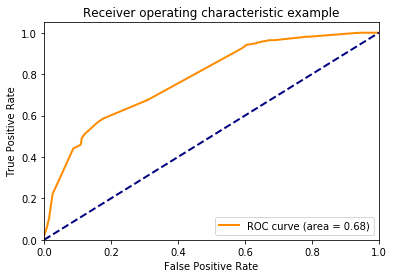

In [34]:
getROC(testY, predictions, proba)

In [35]:
getMC(testY, predictions)

[[272 121]
 [170 355]]


In [36]:
coefficientModel

array([[-0.53447047, -1.12172739,  0.0983905 , -1.8395445 , -0.09932075]])

In [37]:
#Deuxième modèle
MoyenneCoefficient = coefficientModel.mean(axis=0)
MoyenneCoefficient

array([-0.53447047, -1.12172739,  0.0983905 , -1.8395445 , -0.09932075])

In [38]:
nouveauData = Signal_tot.drop(columns=['Signal_BBAND','Signal_MACD'])

In [39]:
nouvellePredictions, nouveauTrainScores, nouveauTestsScore, aic, nouveauCoefficientModel, nouveauTestY, nouveauModel, proba= calculModelLogit(np.array(nouveauData), Y)

Train score= 0.7110177404295052
Test score= 0.6884531590413944
AIC score : -1064.5767222569855


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


On a donc améliorer de 0,5 % notre score en retirant deux colonnes!

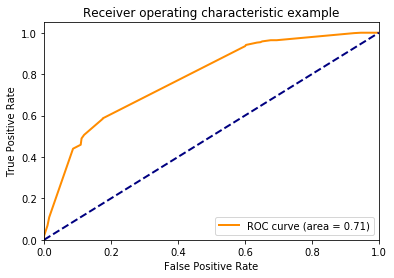

In [40]:
getROC(nouveauTestY, nouvellePredictions, proba)

In [41]:
getMC(nouveauTestY, nouvellePredictions)

[[324  69]
 [217 308]]


On veut utiliser l'elimination recursive !

In [42]:
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
X = np.array(Signal_tot)
Y = rend_tot
rfe = RFE(model, 20)
rfe = rfe.fit(X, Y)
print(rfe.support_)
print(rfe.ranking_)
rapport = rfe.support_

nouvelleDB=Signal_tot
## On veut visualiser les variables qui ne sont pas sélectionnées
for i in range(0,len(rapport)):
    if rapport[i]==False :
        sigle = Signal_tot
        print("Le paramètre:",feature_list[i], "n'est pas selectionné")
        nouvelleDB = nouvelleDB.drop(sigle, axis="columns")

[ True  True  True  True  True]
[1 1 1 1 1]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


On voit que rien n'a été enlever

3.	Présentez le modèle sélectionné. 

On va utiliser ce model: 

In [43]:
#nouveauData

Évaluez la capacité de classification.

# -------------------------------------------------------------------------------------------

# Arbre de decision

In [44]:
def calculModelArbreDecision(X,Y):
    trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.30, random_state = 0)
    ModeleArbre = DecisionTreeClassifier()
    
    TrainFit = ModeleArbre.fit(trainX, trainY)
    
    TrainScores = ModeleArbre.score(trainX, trainY)
    print('Train score=',TrainScores)
    
    TestsScore = ModeleArbre.score(testX, testY)
    print('Test score=',TestsScore)
    
    predictions = ModeleArbre.predict(testX)
    
    proba = ModeleArbre.predict_proba(testX)[:,1]
    
    mse = mean_squared_error(testY, predictions)
    aic = calculate_aic(len(testY),mse,len(X.T))
    print('AIC score :',aic)
    return predictions, TrainScores, TestsScore, aic, testY, testX, proba

In [45]:
predictions, TrainScores, TestsScoretree, aic, testY, testX, prob = calculModelArbreDecision(X, Y)

Train score= 0.7156862745098039
Test score= 0.6873638344226579
AIC score : -1057.372530522278


Pour l'echantillon test

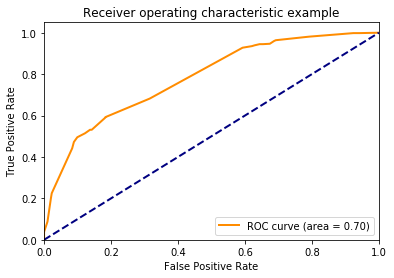

In [46]:
getROC(testY, predictions, prob)

In [47]:
getMC(testY, predictions)

[[321  72]
 [215 310]]


Répétez l’exercices avec les variables sélectionnées par le modèle Logit

In [48]:
nouvellePredictions, nouveauTrainScores, nouveauTestsScore, nouveauAIC, nouveautestY, nouveautestX, prob = calculModelArbreDecision(nouveauData, Y)

Train score= 0.7124183006535948
Test score= 0.690631808278867
AIC score : -1071.0188539576232


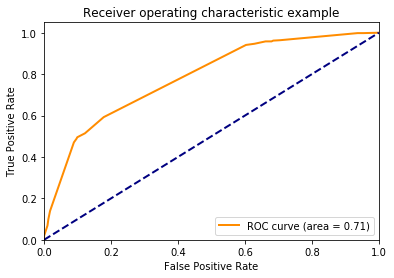

In [49]:
getROC(nouveautestY, nouvellePredictions, prob)

In [50]:
getMC(nouveautestY, nouvellePredictions)

[[323  70]
 [214 311]]


# EXPLICATION

Notez les principales différences et similitudes et expliquez les divergences.

# Random Forest 

In [51]:
def calculModelRandomForest(X,Y):
    trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.30, random_state = 42)
    ModeleRF = RandomForestClassifier()
    
    TrainFit = ModeleRF.fit(trainX, trainY)
    
    TrainScores = ModeleRF.score(trainX, trainY)
    print('Train score=',TrainScores)
    
    TestsScore = ModeleRF.score(testX, testY)
    print('Test score=',TestsScore)
    
    proba = ModeleRF.predict_proba(testX)[:,1]
    
    mse = mean_squared_error(testY, predictions)
    aic = calculate_aic(len(testY),mse,len(X.T))
    print('AIC score :',aic)
    variableImportante = ModeleRF.feature_importances_
    return predictions, TrainScores, TestsScore, aic, testY, variableImportante, proba

In [52]:
predictions, TrainScores, TestsScoreforest, AIC, testY, variableImportante, prob = calculModelRandomForest(X, Y)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Train score= 0.7166199813258637
Test score= 0.6862745098039216
AIC score : -589.0745521624536


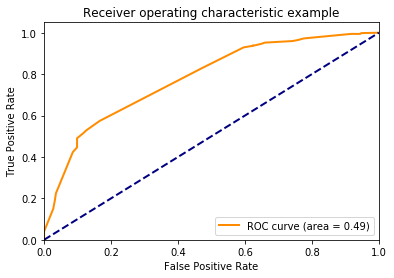

In [53]:
getROC(testY, predictions, prob)

In [54]:
getMC(testY, predictions)

[[227 169]
 [309 213]]


Identifiez les variables les plus importantes (‘’Variable Importance’’)

In [55]:
print(sig)
print(variableImportante)

['Signal_MFI', 'Signal_RSI', 'Signal_BBAND', 'Signal_STOK', 'Signal_MACD']
[0.06258348 0.10883059 0.02802459 0.77226232 0.02829902]


Comparez les variables sélectionnées par Random Forest au modèle Logit.

1) Quelles sont les variables d’importance similaires.

2) Quelles sont les variables différentes

3) Pourquoi les variables sélectionnées ne sont pas totalement similaires?

# Répétez l’exercices pour des méthodes plus flexibles mais opaques.

1- Linéaire

In [56]:
from sklearn.svm import SVC 
def calculModelSVM(X,Y,typ):
    trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.30, random_state = 42)
    ModeleSVM = SVC(kernel=typ)
    
    TrainFit = ModeleSVM.fit(trainX, trainY)
    
    TrainScores = ModeleSVM.score(trainX, trainY)
    print('Train score=',TrainScores)
    
    TestsScore = ModeleSVM.score(testX, testY)
    print('Test score=',TestsScore)
    
    #proba = ModeleSVM.predict_proba(testX)[:,1]
    
    mse = mean_squared_error(testY, predictions)
    aic = calculate_aic(len(testY),mse,len(X.T))
    print('AIC score :',aic)
    return predictions, TrainScores, TestsScore, aic, testY, proba

In [57]:
predictions, TrainScores, TestsScorelin, aic, testY, prob = calculModelSVM(X,Y,'linear')

Train score= 0.7049486461251168
Test score= 0.6851851851851852
AIC score : -589.0745521624536


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


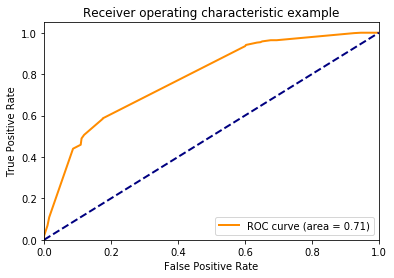

In [58]:
getROC(nouveautestY, nouvellePredictions, prob)

In [59]:
getMC(testY, predictions)

[[227 169]
 [309 213]]


2- Radiale

In [60]:
predictions, TrainScores, TestsScoreradial, aic, testY, prob = calculModelSVM(X,Y,'rbf')

Train score= 0.7119514472455649
Test score= 0.6786492374727668
AIC score : -589.0745521624536


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


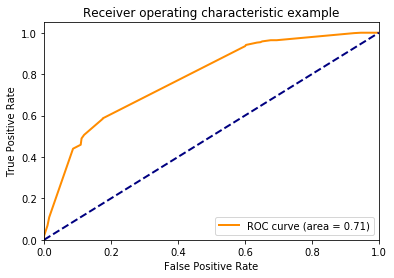

In [61]:
getROC(nouveautestY, nouvellePredictions, prob)

In [62]:
getMC(testY, predictions)

[[227 169]
 [309 213]]


# Comparer une dernière fois, l’ensemble des modèles, sélectionnez-en un et expliquez votre choix.

In [66]:
accuracy = pd.DataFrame([TestsScorelogit,TestsScoreforest,TestsScoretree, TestsScoreradial,TestsScorelin],
                       index = ['Logit','Forest','Tree','Radial','Linéaire'], columns = ['%Tests'])*100
accuracy

,%Tests
Logit,68.300654
Forest,68.627451
Tree,68.736383
Radial,67.864924
Linéaire,68.518519


# Répétez l’exercice mais cette fois-ci pour chaque ETF pris individuellement.